In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib; matplotlib.rcParams['figure.figsize'] = (8,3)

In [2]:
import numpy as np

In [3]:
# Reload all packages - make debugging easier
%load_ext autoreload
%autoreload 2

---

In [4]:
from nnmf_svi_eddie import NNMF

---

In [5]:
def plot_R(rhats, r=None, title=''):
    _, n_items = rhats.shape
    f, axes = plt.subplots(1, n_items, sharex=True, sharey=True)
    i = 0
    for j in range(n_items):
        if r is not None:
            axes[j].axvline(x=r[j], color='r')
        axes[j].hist(rhats[:,j])
    plt.xlim([0,6])
    f.suptitle(title)
    plt.show()

In [6]:
R    = np.array([[1,3,3,4,5],
                 [1,2,4,3,5],
                 [5,3,2,5,1]])

In [7]:
model = NNMF(ratings_matrix=R, D=2, Dp=3, batch_size=5, nn_hidden_layer_dims=[2])

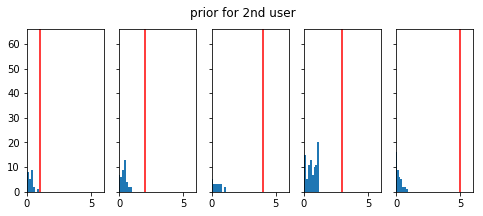

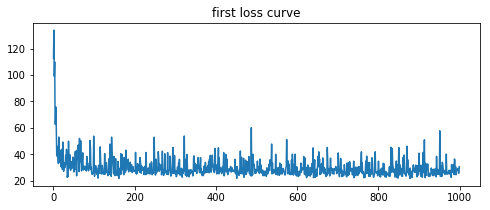

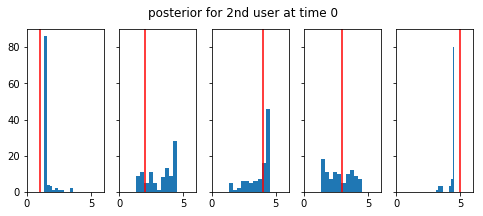

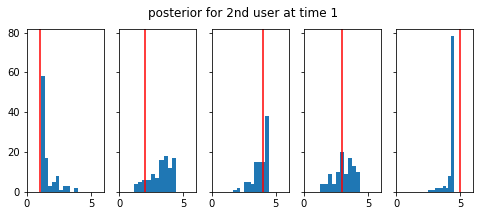

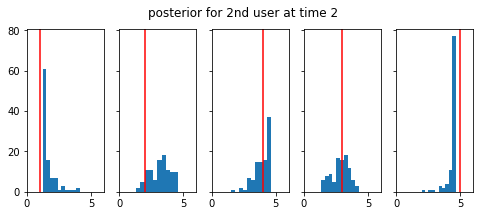

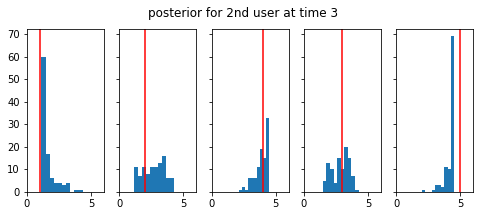

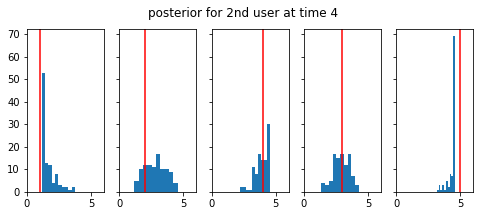

In [8]:
plot_R(model.sample_user_ratings(1), R[1,:], title='prior for 2nd user')

mask = np.array([[1,1,1,1,1],
                 [1,0,0,0,0],
                 [1,1,1,1,1]])
losses = model.train(mask=mask, verbose=True)
plt.plot(losses)
plt.title('first loss curve')
plt.show()
plot_R(model.sample_user_ratings(1), R[1,:], title='posterior for 2nd user at time 0')

mask = np.array([[1,1,1,1,1],
                 [1,0,1,0,0],
                 [1,1,1,1,1]])
losses = model.train(mask=mask, verbose=True)
plot_R(model.sample_user_ratings(1), R[1,:], title='posterior for 2nd user at time 1')

mask = np.array([[1,1,1,1,1],
                 [1,0,1,1,0],
                 [1,1,1,1,1]])
losses = model.train(mask=mask, verbose=True)
plot_R(model.sample_user_ratings(1), R[1,:], title='posterior for 2nd user at time 2')

mask = np.array([[1,1,1,1,1],
                 [1,1,1,1,0],
                 [1,1,1,1,1]])
losses = model.train(mask=mask, verbose=True)
plot_R(model.sample_user_ratings(1), R[1,:], title='posterior for 2nd user at time 3')

mask = np.array([[1,1,1,1,1],
                 [1,1,1,1,1],
                 [1,1,1,1,1]])
losses = model.train(mask=mask, verbose=True)
plot_R(model.sample_user_ratings(1), R[1,:], title='posterior for 2nd user at time 4')

Looks like it doesn't work well on the small problem. Check out the bigger data version of this.